<h1><center>Calculating the axion relic density from the EOM</center></h1>

In this lab we will be solving the axion equation of motion numerically and hence calculating the relic density of axion DM today.


In [1]:
import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rc('font', size=16)

## 1) Rewritting our ODE

Given that $\phi=f_a\theta$, where $f_a$ is the scale of PQ symmetry breaking, we can write the EOM for our axion in an expanding universe as

\begin{equation}
    \frac{d^2\theta}{dt^2} + 3H(T)\frac{d\theta}{dt} + \frac{1}{f_a^2}\frac{\partial V(\theta)}{\partial\theta} = 0.
\end{equation}

However, this equation is currently in terms of time derivatives which isn't very convienient since we don't have an equation for $T = T(t)$. We can however, calculate $\frac{dt}{dT}$ and hence rewrite our eom in terms of temperature derivatives.

The expansion is governed by the Friedmann equations

\begin{equation}
   H^2 = \frac{8\pi}{3M_{pl}^2}\rho
\end{equation}

\begin{equation}
    \frac{d\rho}{dt}  = -3H(T)(\rho + p) = -3HsT
\end{equation}

where $\rho$, $p$ and $s$ are the energy density, pressure and entropy density of the early universe and $M_{pl}$ is the Planck mass (<i>Note: g_s(T) is just what we called g_*(T) in last lab sheet</i>). At the temperatures where axion production happens, the contribution of axions to these densities can be neglected.

Therefore, $\rho$ and $s$ can be expressed as

\begin{equation}
    \rho = \frac{\pi^2}{30}g_{\rho}T^4
\end{equation}

\begin{equation}
    s = \frac{2\pi^2}{45}g_{s}T^3
\end{equation}

where $g_{\rho}$ and $g_{s}$ are the effective degrees of freedom for the energy density  and for the entropy density respectively.

**1.1** Hence show that

\begin{equation}
    \frac{dt}{dT} = -M_{pl}\sqrt{\frac{45}{64\pi^3}}\frac{1}{T^3g_s(T)\sqrt{g_{\rho}(T)}}\Big( T \frac{dg_{\rho}(T)}{dT} + 4g_{\rho}(T) \Big)
\end{equation}

**1.2** Using this, show that our EOM can be written as

\begin{equation}
    \frac{d^2\theta}{dT^2} + \Big[3H(T)\frac{dt}{dT} - \frac{d^2 t}{d T^2}/\frac{dt}{dT} \Big]\frac{d \theta}{d T} + \frac{1}{f_a^2}\Big(\frac{dt}{dT}\Big)^2\frac{\partial V(\theta)}{\partial \theta} = 0
\end{equation}


## 2) Calculating $\frac{dt}{dT}$

Recall the following table of values from the last lab sheet:

<table  style= "width:100%">
  <tr>
    <th>$\log_{10}{T}$ [MeV]</th>
    <td>0.0</td><td>0.5</td><td>1.0</td><td>1.25</td><td>1.6</td><td>2.0</td><td>2.15</td><td>2.2</td><td>2.4</td><td>2.5</td><td>3.0</td><td>4.0</td><td>4.3</td><td>4.6</td><td>5.0</td><td>5.45</td>
  </tr>
    
  <tr>
    <th>$g_{\rho}$</th>
    <td>10.71</td><td>10.74</td><td>10.76</td><td>11.09</td><td>13.68</td><td>17.61</td><td>24.07</td><td>29.84</td><td>47.83</td><td>53.04</td><td>73.48</td><td>83.1</td><td>85.56</td><td>91.97</td><td>102.17</td><td>104.98</td>
  </tr>
  <tr>
    <th>$\frac{g_{\rho}}{g_{s}}$</th>
    <td>1.00228</td><td>1.00029</td><td>1.00048</td><td>1.00505</td><td>1.02159</td><td>1.02324</td><td>1.05423</td><td>1.07578</td><td>1.06118</td><td>1.0469</td><td>1.01778</td><td>1.00123</td><td>1.00389</td><td>1.00887</td><td>1.0075</td><td>1.00023</td>
  </tr>
</table>

**2.1** Use <a href="https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d">scipy.interpolate.interp1d</a> or otherwise to create splines of $g_{\rho}$, $g_{s}$ and $\frac{dt}{dT}$.

**2.2** Then, using <a href="https://numpy.org/doc/1.18/reference/generated/numpy.gradient.html">numpy.gradient</a> calcuate and spline $\frac{d^2t}{dT^2}$

**2.3** Check these by plotting the splined curves along with the original data.


<i>Hint: To get a smooth approximation for $\frac{d^2t}{dT^2}$, it might be best to calculate this using the splined version of $\frac{dt}{dT}$.</i>

In [2]:
import numpy as np

# Constants
M_pl = 1.22e19 # Plank mass (GeV)
hbar = 6.58e-25 # GeV s
c = 3e8 # m / s

T0 = 2.35e-13 # GeV
rho_crit = 8.01e-47 # h^{-2} GeV

s_today = 2*np.pi**2/45*3.9309363*T0**3


litte_h = 0.7

In [3]:
from scipy.interpolate import interp1d

# Lattice QCD data
Tr_data = np.array([0.0, 0.50, 1.00, 1.25, 1.60, 2.00, 2.15, 2.2, 2.4, 2.5, 3.0 ,4.0, 4.3, 4.6,5,5.45])
gr_data = np.array([10.71,10.74,10.76,11.09,13.68,17.61,24.07,29.84,47.83,53.04,73.48,83.10,85.86,91.97,102.17,104.98])
conv = np.array([1.00228,1.00029,1.00048,1.00505,1.02159,1.02324,1.05423,1.07575,1.06118,1.04690,1.01778,1.00123,1.00389,1.00887,1.00750,1.00023])
gs_data = gr_data/conv

# Calculate dt/dT
T = 10**Tr_data*1e-3 # GeV

const = -M_pl*np.sqrt(45/(64*np.pi**3))
A = 1/(T**3*gs_data*gr_data**(1/2))
B = (T*np.gradient(gr_data, T) + 4*gr_data)
dtdT_data = const * A * B 

# Make splines
gr_int = interp1d(Tr_data-3, gr_data, kind = 'cubic')
dtdT_int = interp1d(Tr_data-3, np.log10(abs(dtdT_data)), kind = 'cubic')
gs_int = interp1d(Tr_data-3, gs_data, kind = 'cubic')

def g_s(T):
    '''Takes temperature in GeV and returns effective degrees of freedom for entropy'''
    return gs_int(np.log10(T))

def g_rho(T):
    '''Takes temperature in GeV and returns effective degrees of freedom for energy'''
    return gr_int(np.log10(T))

def dtdT(T):
    '''Takes temperature in GeV and returns derivative of time wrt temperature in GeV^{-2}'''
    return -10**dtdT_int(np.log10(T))

# Calculate and spline 
T2 = np.logspace(np.log10(max(T)), np.log10(min(T)), int(1e4))
d2tdT2_data = np.gradient(dtdT(T2), T2) 
dt2dT2_int = interp1d(np.log10(T2), np.log10(d2tdT2_data), kind = 'cubic')

def d2tdT2(T):
    '''Takes temperature in GeV and returns second derivative of time wrt temperature 
    in GeV^{-3}'''
    return 10**dt2dT2_int(np.log10(T))


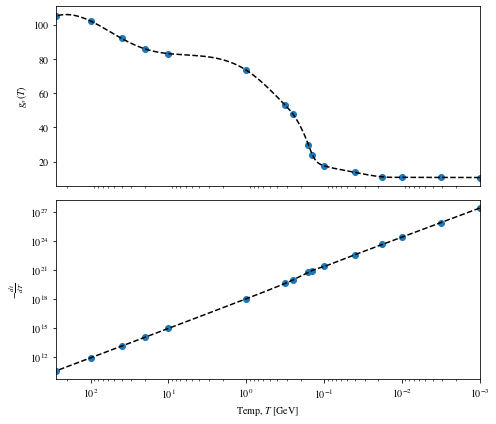

In [4]:
import matplotlib.pyplot as plt
# Plot the splines

fig = plt.figure(figsize = (7, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# dummy T
T2 = np.logspace(-3, 2.45, 1000)

# Plot g_rho(T)
ax1.semilogx(T, gr_data, 'o')
ax1.semilogx(T2, g_rho(T2), 'k--')
ax1.set_xlim(T2[-1], T2[0])
ax1.set_xticks([])
ax1.set_ylabel(r"$g_{\rho}(T)$")


ax2.loglog(T, -dtdT_data, 'o')
ax2.loglog(T2, -dtdT(T2), "k--")
ax2.set_xlabel("Temp, $T$ [GeV]")
ax2.set_xlim(T2[-1], T2[0])
#ax2.set_xticks([])
ax2.set_ylabel(r"$-\frac{dt}{dT}$")

plt.tight_layout()

plt.show()

## 3) Solving our ODE (simplified case)

The potential for the axion field is given by

\begin{equation}
    V(\theta) = m_a^2(T)f_a^2(1 - \cos\theta) = \chi(T)(1-\cos\theta)
\end{equation}

We will start by some axion-like-particle (ALP) whose mass is temperture independent and assuming that our $\theta$ angle is small. 

This enables us to simplify our potential to 

\begin{equation}
    V(\theta) = \frac{1}{2}f_a^2m_a^2\theta^2
\end{equation}

Our equation of motion is then 

\begin{equation}
    \frac{d^2\theta}{dT^2} + \Big[3H(T)\frac{dt}{dT} - \frac{d^2 t}{d T^2}/\frac{dt}{dT} \Big]\frac{d \theta}{d T} + \Big(\frac{dt}{dT}\Big)^2m_a^2\theta = 0
\end{equation}

Unlike the Boltzmann equation in the last lab sheet, which was a first order ODE, we are now faced with solving a second order ODE. Forunately, we can still use `odeint`. An example of how to do this is shown below.

**3.1** Use this example to solve the ODE over some <i>appropriate</i> temperature range for $\theta_i = 1$, $mass = 4 \times 10^{-15}$ GeV.

**3.2** Plot the decay as a function of temperature 
 

*Hint 1: We only need to solve the field for temperatures around the point at which the axion field begins to oscillate $T_{osc}$. This is given by $3H(T_{osc}) \approx m_a(T_{osc})$.*
    
*Hint 2: Over the course of our simulation, our temperatures will change by orders of magnitude. It is therefore best to make the temperature steps we give to `odeint` <b>logspaced</b>.*

In [5]:
# Functions for density, Hubble parameter and Entropy

def rhoFunc(T):
    '''Takes temperature in GeV and returns radiation density in GeV^4'''
    rho = np.pi**2/30*g_rho(T)*T**4
    return rho 

def HFunc(T):
    '''Takes temperature in GeV and returns Hubble parameter H in
    GeV^2'''
    H = np.sqrt(8*np.pi/(3*M_pl**2)*rhoFunc(T))
    return H

def entropy(T):
    '''Takes temperature in GeV and returns entropy in GeV'''
    return 2*np.pi**2/45*g_s(T)*T**3

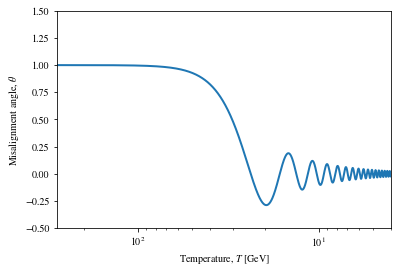

In [6]:
from scipy.integrate import odeint

def ode1(y, T, mass):
    '''Simplified axion EOM'''
    theta, omega = y

    #mass = np.sqrt(chiFunc(1e-4))/f_a
    A = d2tdT2(T)/dtdT(T)
    B = - 3*HFunc(T)*dtdT(T)
    C = - dtdT(T)**(2)*mass**2*theta
    
    d_omega = (A + B)*omega + C
    derivs = [omega, d_omega]
    
    return derivs

theta_i = 1
mass = 4e-15 #GeV

y0 = [theta_i, 0]
T = np.logspace(2.45, 0.6, int(1e4))

soln = odeint(ode1, y0, T, args = (mass,))

plt.semilogx(T, soln[:,0], ls = '-', lw = 2)
plt.xlim(max(T),min(T))
plt.ylim(-0.5, 1.5)
plt.xlabel("Temperature, $T$ [GeV]")
plt.ylabel(r"Misalignment angle, $\theta$")
plt.show()

## 4) Calculating the relic density

The axion density is given by 

\begin{equation}
    \rho_a = \frac{f_a^2}{2}\Big(\frac{d \theta}{dt}\Big)^2 + V(\theta)
\end{equation}

We can use this to calculate the axion number density $n_a$. Then, recalling that $\frac{n}{s}$ is a <i>conserved</i> quantity, we can calculate the number density today $n_0$ using the fact that todays entropy density is given by

\begin{equation}
    s_0 = \frac{2\pi^2}{45} (2T_{\gamma}^3  + 6\frac{7}{8}T_{\nu}^3) = \frac{2\pi^2}{45}\frac{43}{11}T_{\gamma}^3
\end{equation}

Turning this back into an energy density using the mass at $T_0$ (the same for the temperature independant mass case), we can compute the relic density using

\begin{equation}
    \Omega_a = \frac{\rho_a}{\rho_c}
\end{equation}

**4.1** Taking $f_a = 10^{12}$ GeV, use your solution to calculate $\rho_a$ and $n_a$ as a function of temperature (Make sure you first convert the above equation for $\rho_a$ into one using derivatives with respect to temperature). 

**4.2** Plot $\rho_a$ and $n/s$ as a function of temperature. >Has your $n/s$ curve converged to a constant value?

**4.3** Calculate $\Omega_ah^2$ using the final value of $n/s$ from your simulation. How does this change if you change $\theta_i$ or $m_a$?

<i>Hint: You can use the $\rho_c = 8.1\times10^{-47}$ $h^{2}$ GeV $^4$ and $T_0 = 2.35 \times 10^{13}$ GeV.</i>

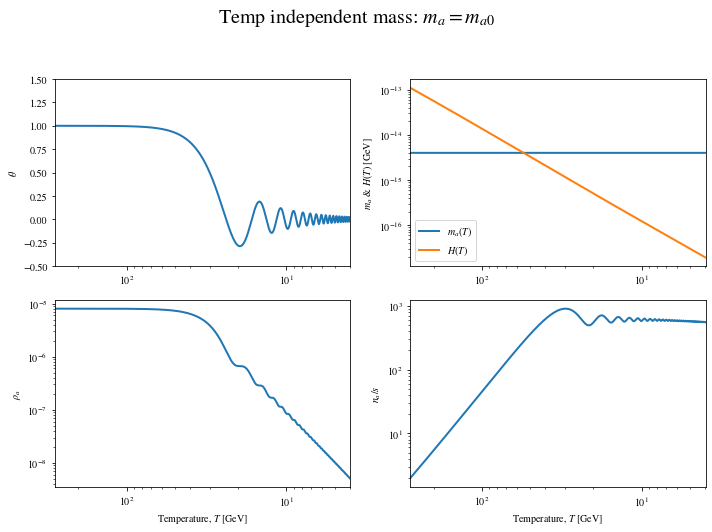

n_0 = 1.25e-35 GeV^3
rho_0 = 5.01e-50 GeV^3
Omega_a = 0.00015


In [7]:
f_a = 1e12 # GeV

theta = soln[:,0]
dtheta_dT = soln[:,1]

axion_density = 0.5*f_a**2*(dtheta_dT / dtdT(T))**2 + 1/2*mass**2*f_a**2*theta**2

number_density = axion_density/mass

fig = plt.figure(figsize = (10,7))
fig.suptitle(r'Temp independent mass: $m_a = m_{a0}$', fontsize=20,y=1.05)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.semilogx(T, theta, '-', lw = 2)
ax1.set_xlim(max(T),min(T))
ax1.set_ylim(-0.5, 1.5)
ax1.set_ylabel(r"$\theta$")

ax2.loglog(T, np.zeros(len(T))+mass, '-', lw = 2, label = "$m_a(T)$")
ax2.loglog(T, HFunc(T), '-', lw = 2, label = "$H(T)$")
ax2.set_xlim(max(T),min(T))
ax2.set_ylabel(r"$m_a$ & $H(T)$ [GeV]")
ax2.legend(loc=3)

ax3.loglog(T, axion_density, '-', lw = 2)
ax3.set_xlim(max(T),min(T))
ax3.set_ylabel(r"$\rho_a$")
ax3.set_xlabel("Temperature, $T$ [GeV]")

ax4.loglog(T, number_density/entropy(T), lw = 2)
ax4.set_xlim(max(T),min(T))
ax4.set_ylabel("$n_a/s$")
ax4.set_xlabel("Temperature, $T$ [GeV]")

plt.tight_layout()
plt.show()

number_density_today = number_density[-1]/entropy(T[-1])*s_today
print("n_0 = {:.3} GeV^3".format(number_density_today))
print("rho_0 = {:.3} GeV^3".format(number_density_today*mass))
print("Omega_a = {:.3}".format(number_density_today*mass/rho_crit*litte_h**4))

## 5) Temperature dependent mass

Unfortunately we know that the mass of the QCD axion <b>is</b> temperature dependent. So we will have to do a little more work. 

The temperature dependence of the axion mass arises due to the susceptibility of the topological charge $\chi(T)$ via the equation

\begin{equation}
    m_a^2 = \frac{\chi(T)}{f_a^2}.
\end{equation}

Like with $g_s$ and $g_{\rho}$, it's temperature dependent value is determined via lattice QCD.

The following values are also from <a href="https://arxiv.org/abs/1606.07494">Lattice QCD for Cosmology</a>. 

<table  style= "width:30%; background-color: #e1e1e1;">
<tr><th>$T$ [MeV]</th><th>$-\log_{10}(\chi [\mathrm{fm}^{-4}])$</th></tr> 
<tr><td>100</td><td>-1.665</td></tr> 
<tr><td>100</td><td>-1.665</td></tr>
<tr><td>120</td><td>-1.657</td></tr>
<tr><td>140</td><td>-1.759</td></tr>
<tr><td>172</td><td>-2.185</td></tr>
<tr><td>200</td><td>-2.726</td></tr>
<tr><td>240</td><td>-3.396</td></tr>
<tr><td>290</td><td>-4.116</td></tr>
<tr><td>350</td><td>-4.746</td></tr>
<tr><td>420</td><td>-5.347</td></tr>
<tr><td>500</td><td>-5.908</td></tr>
<tr><td>600</td><td>-6.499</td></tr>
<tr><td>720</td><td>-7.0811</td></tr>
<tr><td>860</td><td>-7.6713</td></tr>
<tr><td>1000</td><td>-8.1715</td></tr>
<tr><td>1200</td><td>-8.7917</td></tr>
<tr><td>1500</td><td>-9.562</td></tr>
<tr><td>1800</td><td>-10.2023</td></tr>
<tr><td>2100</td><td>-10.7526</td></tr>
<tr><td>2500</td><td>-11.3828</td></tr>
<tr><td>3000</td><td>-12.0533</td></tr>
</table>

**5.1** Use <a href="https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d">scipy.interpolate.interp1d</a> or otherwise to create a spline $\chi(T)$. (The data is only given for a limited temperature range. However, we can extrapolate these values to high and low $T$. An example of how to do this is given below)

**5.2** Check this by plotting the splined curve along with the original data.

**5.3**  Write down the new ODE for the temperature dependent axion mass

**5.4** Use this the write a new ODE solver and hence calculate $\theta$ and a function of temperature for $f_a = 10^{12}$ GeV (Note: $T_{osc}$ is now different).

**5.5** Recalculate $\rho_a$, $n/s$ and hence $\Omega_a$.

**5.6** For this scale ($f_a = 10^{12}$ GeV) the zero-temperature mass $m_a(T=0) = 4 \times 10^{-15}$ GeV. However, you should notice that the relic density is different. Why do you think this is?


*Hint 1: Your solver will now require $f_a$ as an input instead of the mass.*

*Hint 2: Be careful with the units for $\chi(T)$. These should be consistent with all other units in the problem.*

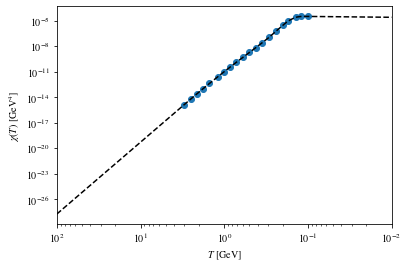

In [8]:
T_top = np.array([100,120,140,172,200,240,290,350,420,500,600,720,
                  860,1000,1200,1500,1800,2100,2500,3000])
chi_log = np.array([-1.665,-1.657,-1.759,-2.185,-2.726,-3.396,-4.116,
                    -4.746,-5.347,-5.908,-6.499,-7.0811,-7.6713,-8.1715,
                    -8.7917,-9.5620,-10.2023,-10.7526,-11.3828,-12.0533])

chiFunc1 = interp1d(np.log10(T_top*1e-3),chi_log,
                    bounds_error = False, fill_value="extrapolate")

# extrapolate works for high T (power law), but at low T does not give correct constant value

def chiFunc(T):
    chi_log = chiFunc1(np.log10(T))
    chi_fm = 10**chi_log
    chi_GeV = chi_fm * (hbar * c / (1e-15))**4
    return chi_GeV

chi0=chiFunc(T_top[0]*1.e-3)


plt.loglog(T_top*1e-3, 10**chi_log*(hbar * c / (1e-15))**4, 'o')
Tspline = np.logspace(2, -2, 100)
plt.loglog(Tspline, chiFunc(Tspline), 'k--')
plt.xlim(max(Tspline), min(Tspline))
plt.ylabel("$\chi(T)$ [GeV$^{4}$]");
plt.xlabel("$T$ [GeV]");


In [9]:
# Define our new temperature dependent ODE

def ode2(y, T, f_a):
    """Temperature dependent axion EOM"""
    theta, omega = y

    mass = np.sqrt(chiFunc(T))/f_a
    A = d2tdT2(T)/dtdT(T)
    B = - 3*HFunc(T)*dtdT(T)
    C = - dtdT(T)**(2)*mass**2*theta
    
    d_omega = (A + B)*omega + C
    derivs = [omega, d_omega]
    
    return derivs

theta_i = 1
f_a = 1e12 #GeV

y0 = [theta_i, 0]
T2 = np.logspace(0.5, -0.5, int(1e4))

soln2 = odeint(ode2, y0, T2, args = (f_a,))

theta2 = soln2[:,0]
dtheta_dT2 = soln2[:,1]
axion_density2 = 0.5*f_a**2*(dtheta_dT2 / dtdT(T2))**2 + 1/2*chiFunc(T2)*theta2**2
mass2 = chiFunc(T2)/f_a
number_density2 = axion_density2/mass2

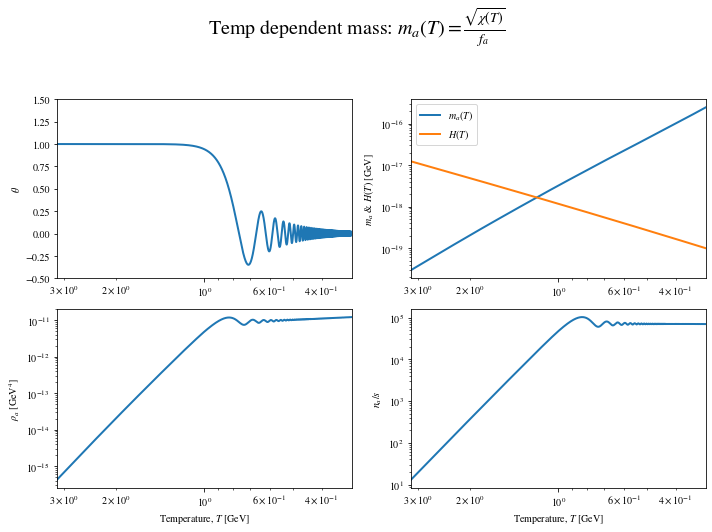

n_0 = 1.57e-33 GeV^3
rho_0 = 5.65e-48 GeV^3
Omega_a = 0.0169


In [10]:
mass2 = np.sqrt(chiFunc(T2))/f_a

number_density2 = axion_density2/mass2

fig = plt.figure(figsize = (10,7))
fig.suptitle(r'Temp dependent mass: $m_a(T) = \frac{\sqrt{\chi(T)}}{f_a}$', fontsize=20,y=1.05)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.semilogx(T2, soln2[:,0], '-', lw = 2)
ax1.set_xlim(max(T2),min(T2))
ax1.set_ylim(-0.5, 1.5)
ax1.set_ylabel(r"$\theta$")

ax2.loglog(T2, mass2, '-', lw = 2, label = "$m_a(T)$")
ax2.loglog(T2, HFunc(T2), '-', lw = 2, label = "$H(T)$")
ax2.set_xlim(max(T2),min(T2))
ax2.set_ylabel(r"$m_a$ & $H(T)$ [GeV]")
ax2.legend(loc=2)

ax3.loglog(T2, axion_density2, '-', lw = 2)
ax3.set_xlim(max(T2),min(T2))
ax3.set_ylabel(r"$\rho_a$ [GeV$^4$]")
ax3.set_xlabel("Temperature, $T$ [GeV]")

ax4.loglog(T2, number_density2/entropy(T2), lw = 2)
ax4.set_xlim(max(T2),min(T2))
ax4.set_ylabel("$n_a/s$")
ax4.set_xlabel("Temperature, $T$ [GeV]")


plt.tight_layout()
plt.show()

mass_today = np.sqrt(chiFunc(1e-5))/f_a
number_density_today2 = number_density2[-1]/entropy(T2[-1])*s_today
print("n_0 = {:.3} GeV^3".format(number_density_today2))
print("rho_0 = {:.3} GeV^3".format(number_density_today2*mass_today))
print("Omega_a = {:.3}".format(number_density_today2*mass_today/rho_crit*litte_h**4))

## 6) Finding the correct relic density

We can now repeat this process over a range of values of $f_a$ and $\theta_i$ similarly to part 7 of the lab sheet on calculating the WIMP relic density.

**6.1** Calulate $\Omega_{a}h^2$ for $\theta_i \in \{10^{-4}, \pi\}$ and $f_a \in \{10^{8}, 10^{14}\}$ GeV. That is, make a 2D array containing the relic density for each combination of initial angle and decay constant.

**6.2** Plot the result using <a href = "https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.contourf.html">matplotlib.pyplot.contourf</a>. 

**6.3** Add to your graph a single contour line indicating the values which give us the observed relic density of $\Omega_{DM}h^2 = 0.12$. An example of how to do this is included <a href="https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/contourf_demo.html#sphx-glr-gallery-images-contours-and-fields-contourf-demo-py">here</a>.

**6.4** How does this compare to our approximate solution from question 7 of problem sheet 5?</li>

*Hint: You will have to reinstate some value of "little h"*

In [11]:
from scipy.optimize import root

def solve(T, f_a):
    return 3*HFunc(T) - np.sqrt(chiFunc(T))/f_a

def FindTosc(f_a):
    return root(solve, 1, args = (f_a,)).x[0]

def SolveTheta(ode, f_a, theta_i, steps):
    '''Takes decay constant and initial misalignment angle and returns the evolved axion
    field for some given ode and number of steps'''
    T_osc = FindTosc(f_a)
    T = np.logspace(np.log10(T_osc*2), np.log10(T_osc/3), int(steps))
    y0 = [theta_i, 0]

    soln = odeint(ode, y0, T, args = (f_a,))
    return soln, T

def FindOmega(soln, T, potential, f_a):
    '''Takes solution from Solve Theta and returns relic density in units h^2'''
    theta = soln[:,0]
    dtheta_dT = soln[:,1]

    axion_density = 0.5*f_a**2*(dtheta_dT / dtdT(T))**2 + potential(T, theta)
    
    mass = np.sqrt(chiFunc(T))/f_a
    
    number_density = axion_density/mass
    number_density_today = number_density[-1]/entropy(T[-1])*s_today
    
    mass_today = np.sqrt(chi0)/f_a
    
    Omega = number_density_today*mass_today/rho_crit*litte_h**4
    return Omega

def potential1(T, theta):
    return 0.5*chiFunc(T)*theta**2

In [12]:
f_as = np.logspace(10, 20, 20)
theta_is = np.logspace(-4, np.log10(np.pi), 20)

Omega1 = np.zeros((len(f_as), len(theta_is)))

print("|", end = "")
# Loop over each combination of f_a and theta_i
for i, f_a in enumerate(f_as):
    for j, theta_i in enumerate(theta_is):
        #print(mass)
        soln, T = SolveTheta(ode2, f_a, theta_i, 1e4)
        Omega1[i,j] = FindOmega(soln, T, potential1, f_a)
        
    # check progress
    print("#", end = "")
print("|")
plt.show()

|####################|


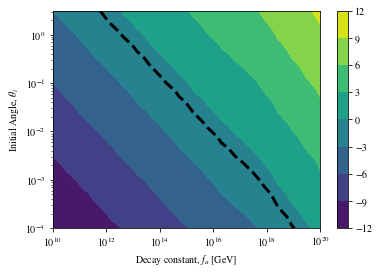

In [13]:
CS = plt.contourf(f_as, theta_is,  np.log10(Omega1.T))
plt.colorbar()
plt.contour(CS, levels=[np.log10(0.12)], colors='k', linewidths = 3, linestyles = '--')
plt.xscale("log")
plt.yscale("log")

plt.ylabel(r"Initial Angle, $\theta_i$");
plt.xlabel(r"Decay constant, $f_a$ [GeV]");

## 7) Anharmonic corrections

Finally there is one more approximation we should address. Given our approximated potential, our calculation above is only valid for small misalignment angles $\theta_i$.

Recall that the full potential is given by

\begin{equation}
    V(\theta) = \chi(T)(1-\cos\theta)
\end{equation}

**7.1** Rewrite your ODE and ODE solver one last time to include the full potential

**7.2** Make a new contourf plot of $\Omega_a$ as done above.

**7.3** In what region do the values for this approach disagree with the one above?

**7.4** How is it different and why?
   
*Hint: You will have to reduce the upper limit of your $\theta_i$ range to be slightly below $\pi$.*

In [14]:
def ode3(y, T, f_a):
    """Temperature dependent axion EOM with full harmonic potential"""
    theta, omega = y

    mass = np.sqrt(chiFunc(T))/f_a
    A = d2tdT2(T)/dtdT(T)
    B = - 3*HFunc(T)*dtdT(T)
    C = - dtdT(T)**(2)*mass**2*np.sin(theta)
    
    d_omega = (A + B)*omega + C
    derivs = [omega, d_omega]
    
    return derivs

def potential2(T, theta):
    return 0.5*chiFunc(T)*(1-np.cos(theta))

f_as = np.logspace(10, 20, 30)
theta_is = np.logspace(-4, 0.99*np.log10(np.pi), 30)

Omega2 = np.zeros((len(f_as), len(theta_is)))

print("|", end = "")
# Loop over each combination of f_a and theta_i
for i, f_a in enumerate(f_as):
    for j, theta_i in enumerate(theta_is):
        soln, T = SolveTheta(ode3, f_a, theta_i, 5e4)
        Omega2[i,j] = FindOmega(soln, T, potential2, f_a)
        
    # check progress
    print("#", end = "")
print("|")

|##############################|


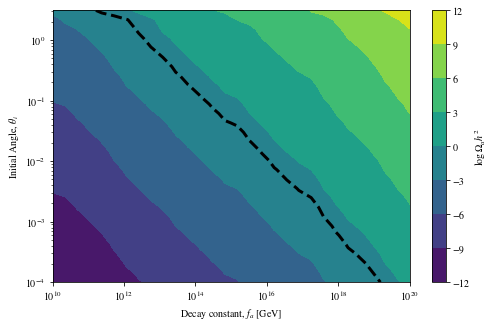

In [15]:
plt.figure(figsize = (8,5))

CS = plt.contourf(f_as, theta_is,  np.log10(Omega2.T))
cbar = plt.colorbar()
cbar.set_label('$\log{\Omega_{a}h^2}$')
plt.contour(CS, levels=[np.log10(0.12)], colors='k', linewidths = 3, linestyles = '--')
plt.xscale("log")
plt.yscale("log")

plt.ylabel(r"Initial Angle, $\theta_i$");
plt.xlabel(r"Decay constant, $f_a$ [GeV]");

## 8) Compare to Approximate Solution

Following an analytical approach similar to lecture 11, we can derive the following equation for the axion relic density (see <a href="https://arxiv.org/abs/1610.01639">Ballesteros et. al</a> for details).

\begin{equation}
    \Omega_a h^2 \approx 0.35 \Big(\frac{\theta_i}{10^{-3}} \Big)^2 \times \begin{cases}
    \Big(\frac{f_a}{3\times10^{17}\mathrm{GeV}}\Big)^{1.17} (f_a \lesssim 3\times10^{17}\mathrm{GeV}),\\
    \Big(\frac{f_a}{3\times10^{17}\mathrm{GeV}}\Big)^{1.54} (f_a \gtrsim 3\times10^{17}\mathrm{GeV}),
    \end{cases} 
\end{equation}

**8.1** Calculate and plot $\Omega_a h^2$ using this equation.

**8.2** How does your numerical solution compare?

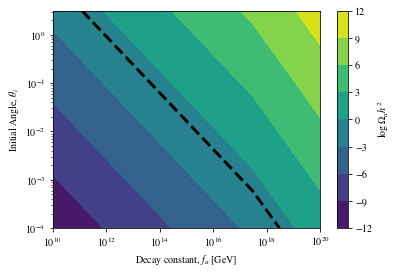

In [16]:
# Calculate Theoretical values
theta_is = np.logspace(-4, np.log10(np.pi),1000)

f_as = np.logspace(10, 20, 1000) #GeV

ThetaT, FaT = np.meshgrid(theta_is, f_as)

Omega3 = np.zeros(ThetaT.shape)
Omega3[FaT<3e17] = 0.35*(ThetaT[FaT<3e17]/0.001)**2*(FaT[FaT<3e17]/3e17)**1.17
Omega3[FaT>3e17] = 0.35*(ThetaT[FaT>3e17]/0.001)**2*(FaT[FaT>3e17]/3e17)**1.54

CS = plt.contourf(f_as, theta_is,  np.log10(Omega3.T))
cbar = plt.colorbar()
cbar.set_label('$\log{\Omega_{a}h^2}$')
plt.contour(CS, levels=[np.log10(0.12)], colors='k', linewidths = 3, linestyles = '--')
plt.xscale("log")
plt.yscale("log")

plt.ylabel(r"Initial Angle, $\theta_i$");
plt.xlabel(r"Decay constant, $f_a$ [GeV]");